In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("lahore_housing_prices.csv")

In [3]:
data.head()

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,5,75500000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,5,25000000
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,6,5,47000000
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,3,28000000
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,5,4,43500000


In [4]:
data.shape

(17169, 7)

In [5]:
data.groupby('Area')['Area'].agg('count')

Area
1 Kanal      3830
1 Marla         6
1.1 Kanal      73
1.1 Marla       2
1.2 Kanal      63
             ... 
9.5 Marla      13
9.6 Marla       1
9.7 Marla       1
9.8 Marla       2
9.9 Marla       2
Name: Area, Length: 170, dtype: int64

In [6]:
data_clean = data.drop('Bath(s)', axis=1)

In [7]:
data_clean.head()

,house_id,Type,Location,Area,Bedroom(s),Price
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,5,75500000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,25000000
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,5,47000000
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,28000000
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,4,43500000


In [8]:
data_clean.isnull().values.any()

False

In [9]:
data_clean.describe()

,house_id,Bedroom(s),Price
count,1.716900e+04,17169.000000,1.716900e+04
mean,4.655362e+07,4.183820,4.758766e+07
std,1.796472e+06,1.294566,5.467632e+07
min,6.872350e+05,1.000000,1.150000e+05
25%,4.652353e+07,3.000000,1.800000e+07
50%,4.706818e+07,4.000000,3.200000e+07
75%,4.731195e+07,5.000000,6.000000e+07
max,4.739719e+07,11.000000,7.171000e+08


In [10]:
data_clean['Type'].unique()

array(['House', 'Flat', 'Penthouse', 'Room'], dtype=object)

In [11]:
data_clean['Area'].unique()

array(['1 Kanal', '8 Marla', '10 Marla', '5 Marla', '2.5 Marla',
       '2 Kanal', '1.3 Kanal', '3 Marla', '4 Marla', '12 Marla',
       '1.1 Kanal', '9 Marla', '6.1 Marla', '7.6 Marla', '7 Marla',
       '3.5 Marla', '6 Marla', '1.3 Marla', '2.3 Marla', '2.2 Marla',
       '2.6 Marla', '2 Marla', '5.5 Marla', '7.3 Marla', '11 Marla',
       '1.8 Marla', '16 Marla', '3.8 Marla', '2.7 Marla', '2.4 Marla',
       '6.8 Marla', '11.1 Marla', '4.2 Marla', '1.4 Marla', '8.7 Marla',
       '1.5 Marla', '1.6 Kanal', '13 Marla', '5.1 Marla', '1.6 Marla',
       '1.5 Kanal', '8.2 Marla', '5.3 Marla', '5.2 Marla', '1.7 Kanal',
       '1.8 Kanal', '1.2 Kanal', '4.6 Marla', '14 Marla', '3.3 Marla',
       '5.4 Marla', '4.9 Marla', '17 Marla', '18 Marla', '4 Kanal',
       '13.4 Marla', '3.9 Marla', '11.5 Marla', '2.8 Marla', '3 Kanal',
       '6.5 Marla', '2.3 Kanal', '4.1 Kanal', '7.8 Marla', '2.9 Marla',
       '15 Marla', '3.2 Marla', '4.5 Marla', '12.7 Marla', '6.3 Marla',
       '1.7 Marla', '

In [12]:
data_clean['size'] = data_clean['Area'].apply(lambda x: x.split(' ')[1])
data_clean['Sqft'] = data_clean['Area'].apply(lambda x: float(x.split(' ')[0]))


In [13]:
data_clean

,house_id,Type,Location,Area,Bedroom(s),Price,size,Sqft
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,5,75500000,Kanal,1.0
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,25000000,Marla,8.0
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,5,47000000,Marla,10.0
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,28000000,Marla,10.0
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,4,43500000,Marla,8.0
...,...,...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",1 Kanal,7,49000000,Kanal,1.0
17165,45309378,House,"DHA Defence, Lahore, Punjab",5 Marla,3,28000000,Marla,5.0
17166,38889542,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,108500000,Kanal,1.0
17167,38081209,House,"DHA Defence, Lahore, Punjab",1 Kanal,5,75500000,Kanal,1.0


In [14]:
data_clean['Sqft'].unique()

array([ 1. ,  8. , 10. ,  5. ,  2.5,  2. ,  1.3,  3. ,  4. , 12. ,  1.1,
        9. ,  6.1,  7.6,  7. ,  3.5,  6. ,  2.3,  2.2,  2.6,  5.5,  7.3,
       11. ,  1.8, 16. ,  3.8,  2.7,  2.4,  6.8, 11.1,  4.2,  1.4,  8.7,
        1.5,  1.6, 13. ,  5.1,  8.2,  5.3,  5.2,  1.7,  1.2,  4.6, 14. ,
        3.3,  5.4,  4.9, 17. , 18. , 13.4,  3.9, 11.5,  2.8,  6.5,  4.1,
        7.8,  2.9, 15. ,  3.2,  4.5, 12.7,  6.3,  3.6, 11.2, 19.2,  4.4,
       12.9,  6.7, 10.5, 10.7,  7.5,  1.9,  2.1, 10.8,  9.3,  7.2,  5.8,
        5.6, 10.1,  9.5,  3.1, 13.1,  8.1, 13.3, 17.8, 14.1, 14.7, 13.5,
       18.7, 14.8,  9.6,  3.7,  4.8,  9.2, 12.5,  9.4, 14.5, 17.2, 13.7,
        4.7,  8.4, 15.1,  8.5, 19. ,  9.8,  9.1, 13.8,  7.9,  6.2,  9.7,
       12.6,  7.1,  6.9,  7.7,  5.9, 12.2,  7.4, 11.6, 11.3, 12.8, 10.6,
       14.2,  6.6, 11.8,  9.9, 11.9, 10.9,  3.4,  8.8, 15.6, 17.5,  5.7,
       18.5, 12.4])

In [15]:
data_clean['Sqft']= data_clean.apply(lambda x: x['Sqft']*272.251 if x['size'] == 'Marla' else x['Sqft']*5445, axis=1)

In [16]:
data_clean

,house_id,Type,Location,Area,Bedroom(s),Price,size,Sqft
0,46326643,House,"DHA Defence, Lahore, Punjab",1 Kanal,5,75500000,Kanal,5445.000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",8 Marla,5,25000000,Marla,2178.008
2,47357581,House,"Paragon City, Lahore, Punjab",10 Marla,5,47000000,Marla,2722.510
3,47397157,Flat,"Askari, Lahore, Punjab",10 Marla,3,28000000,Marla,2722.510
4,43109993,House,"DHA Defence, Lahore, Punjab",8 Marla,4,43500000,Marla,2178.008
...,...,...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",1 Kanal,7,49000000,Kanal,5445.000
17165,45309378,House,"DHA Defence, Lahore, Punjab",5 Marla,3,28000000,Marla,1361.255
17166,38889542,House,"DHA Defence, Lahore, Punjab",1 Kanal,6,108500000,Kanal,5445.000
17167,38081209,House,"DHA Defence, Lahore, Punjab",1 Kanal,5,75500000,Kanal,5445.000


In [17]:
data_c = data_clean.drop(['Area', 'size'], axis=1)

In [18]:
data_c

,house_id,Type,Location,Bedroom(s),Price,Sqft
0,46326643,House,"DHA Defence, Lahore, Punjab",5,75500000,5445.000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",5,25000000,2178.008
2,47357581,House,"Paragon City, Lahore, Punjab",5,47000000,2722.510
3,47397157,Flat,"Askari, Lahore, Punjab",3,28000000,2722.510
4,43109993,House,"DHA Defence, Lahore, Punjab",4,43500000,2178.008
...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",7,49000000,5445.000
17165,45309378,House,"DHA Defence, Lahore, Punjab",3,28000000,1361.255
17166,38889542,House,"DHA Defence, Lahore, Punjab",6,108500000,5445.000
17167,38081209,House,"DHA Defence, Lahore, Punjab",5,75500000,5445.000


In [19]:
len(data_c['Location'].unique())

324

In [20]:
data_c['Location'].unique()

array(['DHA Defence, Lahore, Punjab', 'Bahria Orchard, Lahore, Punjab',
       'Paragon City, Lahore, Punjab', 'Askari, Lahore, Punjab',
       'Khayaban-e-Amin, Lahore, Punjab',
       'Nishtar Colony, Lahore, Punjab',
       'Central Park Housing Scheme, Lahore, Punjab',
       'New Lahore City, Lahore, Punjab',
       'Bahria Nasheman, Lahore, Punjab', 'Bahria Town, Lahore, Punjab',
       'Eden, Lahore, Punjab',
       'State Life Housing Society, Lahore, Punjab',
       'Bankers Avenue Cooperative Housing Society, Lahore, Punjab',
       'Raiwind Road, Lahore, Punjab', 'Johar Town, Lahore, Punjab',
       'Highcourt Society, Lahore, Punjab',
       'Thokar Niaz Baig, Lahore, Punjab',
       'Military Accounts Housing Society, Lahore, Punjab',
       'Defence Road, Lahore, Punjab', 'Multan Road, Lahore, Punjab',
       'Jubilee Town, Lahore, Punjab',
       'Punjab University Employees Society, Lahore, Punjab',
       'Al Noor Park Housing Society, Lahore, Punjab',
       'Harbansp

In [21]:
location_stat = data_c.groupby('Location')['Location'].agg('count').sort_values(ascending=False)

location_stat

Location
DHA Defence, Lahore, Punjab         4845
Bahria Town, Lahore, Punjab         1767
Askari, Lahore, Punjab               852
Raiwind Road, Lahore, Punjab         599
Johar Town, Lahore, Punjab           511
                                    ... 
Khayaban-e-Quaid, Lahore, Punjab       1
Khayaban-e-Zafar, Lahore, Punjab       1
Khayaban-e-Zohra, Lahore, Punjab       1
Abbot Road, Lahore, Punjab             1
Zohra Homes, Lahore, Punjab            1
Name: Location, Length: 324, dtype: int64

In [22]:
location_stat[:2]

Location
DHA Defence, Lahore, Punjab    4845
Bahria Town, Lahore, Punjab    1767
Name: Location, dtype: int64

In [23]:
len(location_stat)

324

In [24]:
print(location_stat[location_stat<=10])
p = location_stat[location_stat<=10]
len(p)

Location
Rail Town (Canal City), Lahore, Punjab    10
Shah Jamal, Lahore, Punjab                10
Zaitoon City, Lahore, Punjab              10
Rehan Garden, Lahore, Punjab              10
Sunfort Gardens, Lahore, Punjab           10
                                          ..
Khayaban-e-Quaid, Lahore, Punjab           1
Khayaban-e-Zafar, Lahore, Punjab           1
Khayaban-e-Zohra, Lahore, Punjab           1
Abbot Road, Lahore, Punjab                 1
Zohra Homes, Lahore, Punjab                1
Name: Location, Length: 223, dtype: int64


223

In [25]:
data_c['Location'] = data_c['Location'].apply(lambda x: 'others' if x in p else x)


In [26]:
len(data_c['Location'].unique())

102

In [27]:
data_c

,house_id,Type,Location,Bedroom(s),Price,Sqft
0,46326643,House,"DHA Defence, Lahore, Punjab",5,75500000,5445.000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",5,25000000,2178.008
2,47357581,House,"Paragon City, Lahore, Punjab",5,47000000,2722.510
3,47397157,Flat,"Askari, Lahore, Punjab",3,28000000,2722.510
4,43109993,House,"DHA Defence, Lahore, Punjab",4,43500000,2178.008
...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",7,49000000,5445.000
17165,45309378,House,"DHA Defence, Lahore, Punjab",3,28000000,1361.255
17166,38889542,House,"DHA Defence, Lahore, Punjab",6,108500000,5445.000
17167,38081209,House,"DHA Defence, Lahore, Punjab",5,75500000,5445.000


In [28]:
data_c['price_per_sqft'] = data_c['Price']/data_c['Sqft']

In [29]:
data_c

,house_id,Type,Location,Bedroom(s),Price,Sqft,price_per_sqft
0,46326643,House,"DHA Defence, Lahore, Punjab",5,75500000,5445.000,13865.932048
1,46952582,House,"Bahria Orchard, Lahore, Punjab",5,25000000,2178.008,11478.378408
2,47357581,House,"Paragon City, Lahore, Punjab",5,47000000,2722.510,17263.481126
3,47397157,Flat,"Askari, Lahore, Punjab",3,28000000,2722.510,10284.627054
4,43109993,House,"DHA Defence, Lahore, Punjab",4,43500000,2178.008,19972.378430
...,...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",7,49000000,5445.000,8999.081726
17165,45309378,House,"DHA Defence, Lahore, Punjab",3,28000000,1361.255,20569.254107
17166,38889542,House,"DHA Defence, Lahore, Punjab",6,108500000,5445.000,19926.538108
17167,38081209,House,"DHA Defence, Lahore, Punjab",5,75500000,5445.000,13865.932048


In [30]:
k = data_c[data_c.Sqft/data_c['Bedroom(s)'] < 300]

In [31]:
len(k)

1940

Text(0, 0.5, 'Count')

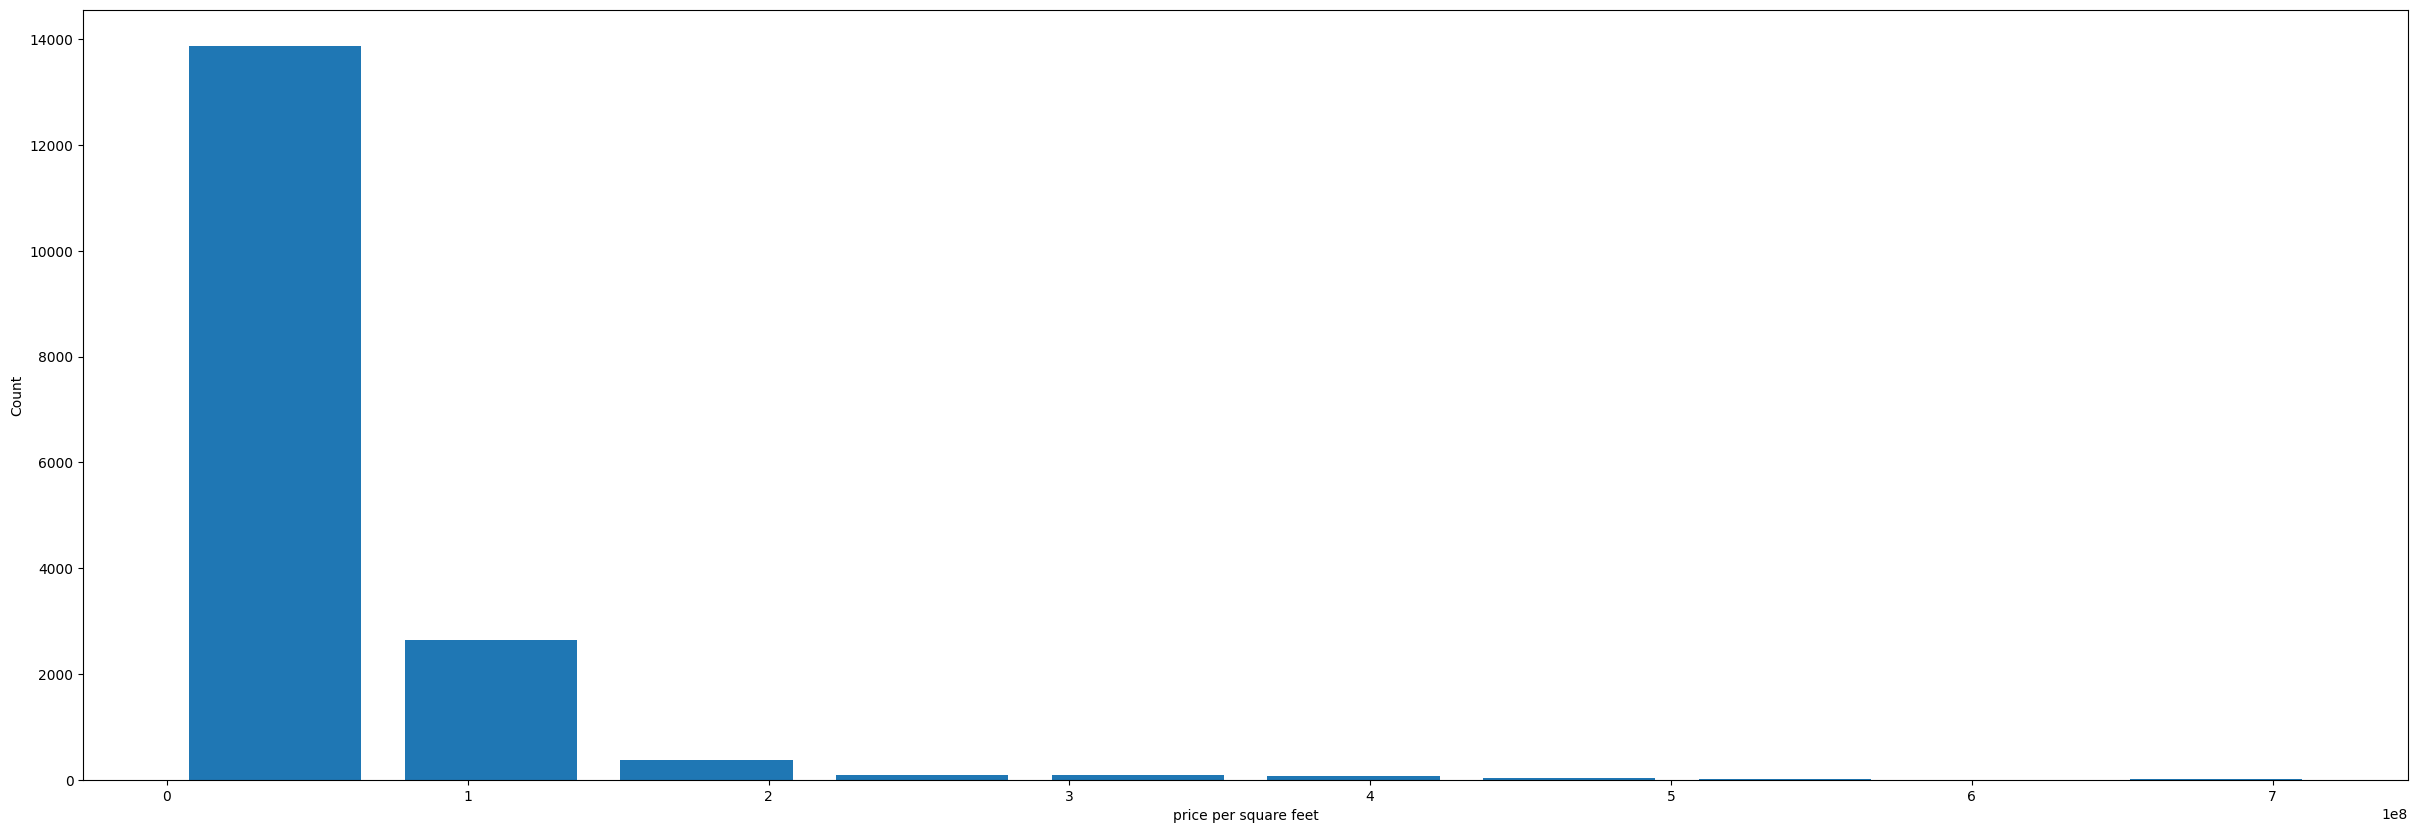

In [32]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (30,10)
plt.hist(data_c.Price, rwidth=0.8)
plt.xlabel("price per square feet")
plt.ylabel("Count")

In [33]:
data['Bath(s)'].unique()

array([ 6,  5,  3,  4,  2,  1,  7,  8,  9, 10])

In [34]:
data[data['Bath(s)']>7]

,house_id,Type,Location,Area,Bath(s),Bedroom(s),Price
267,28162835,House,"DHA Defence, Lahore, Punjab",1 Kanal,8,7,80000000
270,27835382,House,"DHA Defence, Lahore, Punjab",1 Kanal,8,7,77000000
1119,36039711,House,"DHA Defence, Lahore, Punjab",2 Kanal,9,8,140000000
1661,39551819,House,"Gulberg, Lahore, Punjab",4.4 Kanal,8,8,400000000
3605,36408058,House,"DHA Defence, Lahore, Punjab",2 Kanal,8,7,335000000
5008,26169507,House,"Upper Mall, Lahore, Punjab",1.5 Kanal,10,9,140000000
5148,44294081,House,"DHA Defence, Lahore, Punjab",1.2 Kanal,8,7,125000000
5464,38521996,House,"Cantt, Lahore, Punjab",1 Kanal,9,6,125000000
5651,44563706,House,"DHA Defence, Lahore, Punjab",2 Kanal,8,7,370000000
8335,45849864,House,"Military Accounts Housing Society, Lahore, Punjab",12 Marla,8,7,49000000


Text(0, 0.5, 'Count')

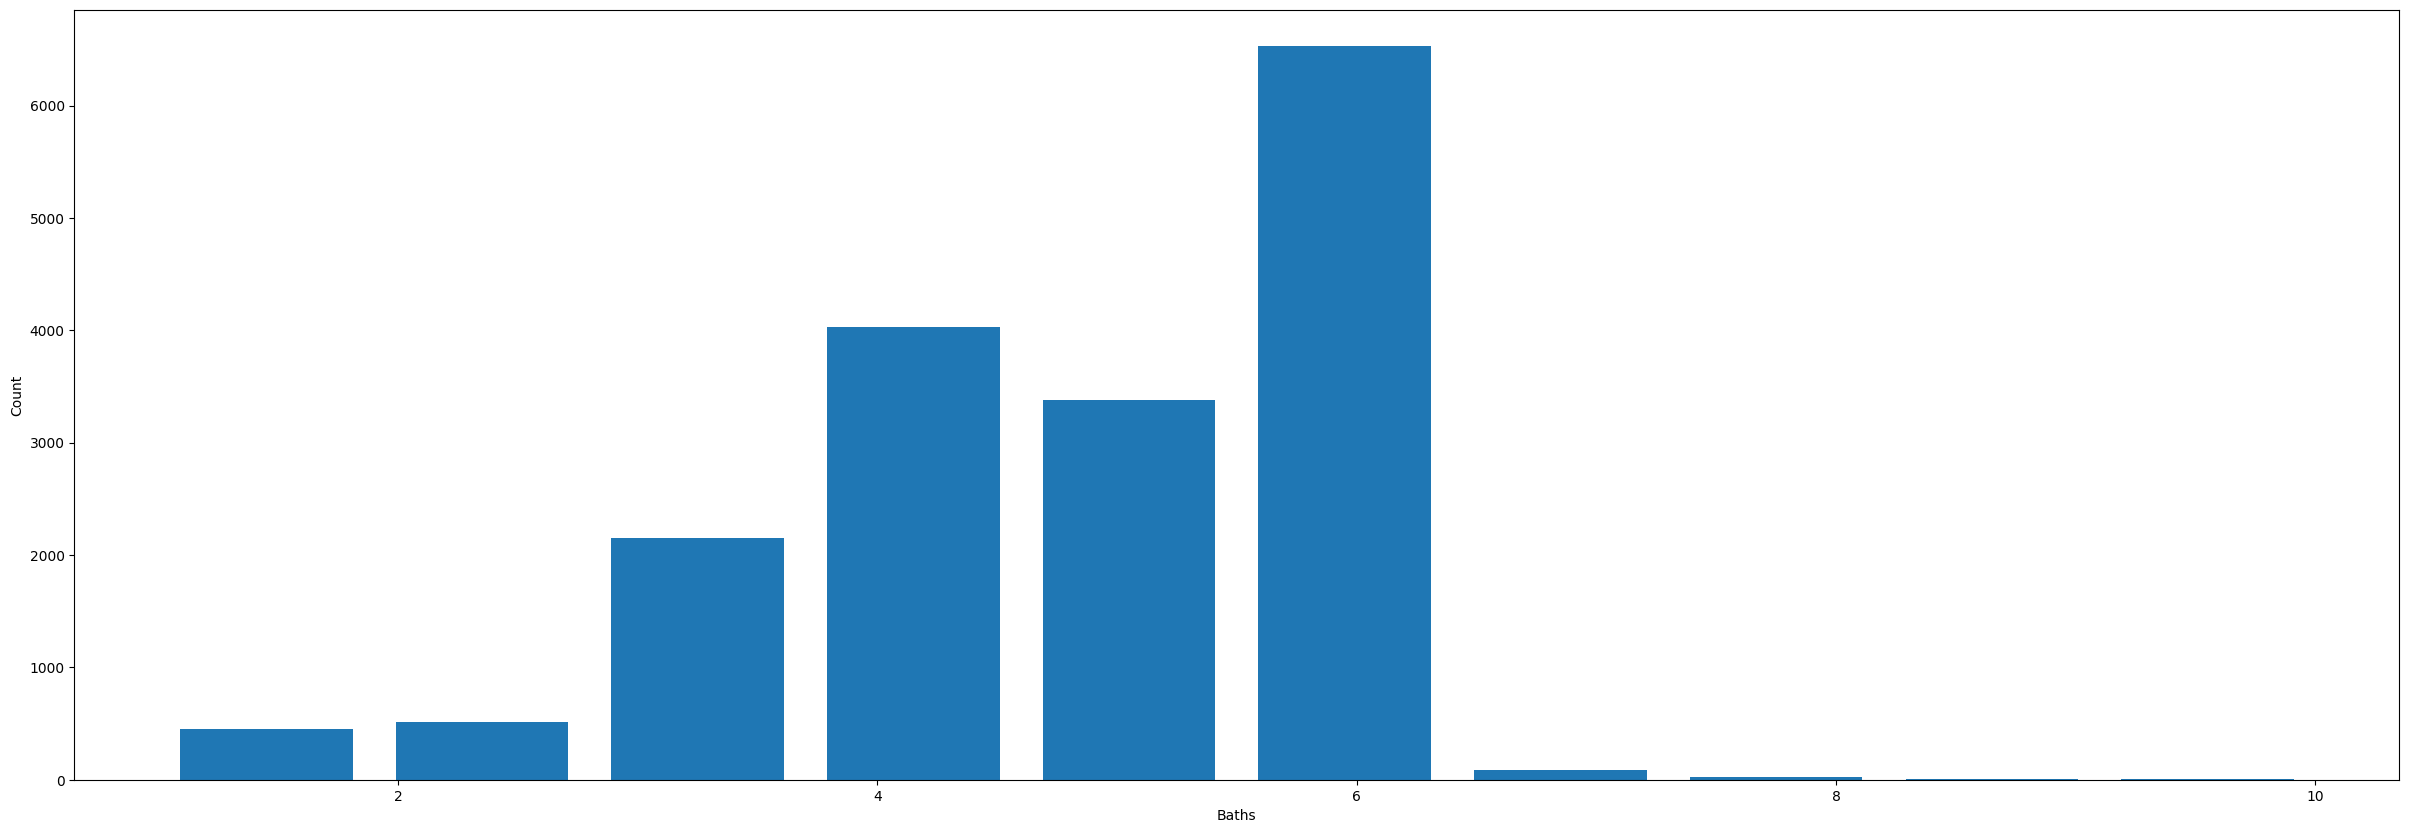

In [35]:
matplotlib.rcParams['figure.figsize'] = (30,10)
plt.hist(data['Bath(s)'], rwidth=0.8)
plt.xlabel("Baths")
plt.ylabel("Count")

In [36]:
df = data_c.drop(["price_per_sqft"], axis= 1)

In [37]:
df

,house_id,Type,Location,Bedroom(s),Price,Sqft
0,46326643,House,"DHA Defence, Lahore, Punjab",5,75500000,5445.000
1,46952582,House,"Bahria Orchard, Lahore, Punjab",5,25000000,2178.008
2,47357581,House,"Paragon City, Lahore, Punjab",5,47000000,2722.510
3,47397157,Flat,"Askari, Lahore, Punjab",3,28000000,2722.510
4,43109993,House,"DHA Defence, Lahore, Punjab",4,43500000,2178.008
...,...,...,...,...,...,...
17164,46266486,House,"PIA Housing Scheme, Lahore, Punjab",7,49000000,5445.000
17165,45309378,House,"DHA Defence, Lahore, Punjab",3,28000000,1361.255
17166,38889542,House,"DHA Defence, Lahore, Punjab",6,108500000,5445.000
17167,38081209,House,"DHA Defence, Lahore, Punjab",5,75500000,5445.000


In [38]:
dummies = pd.get_dummies(df.Location)
dummies.head()

,"Al Noor Park Housing Society, Lahore, Punjab","Al Rehman Garden, Lahore, Punjab","Al-Hafiz Town, Lahore, Punjab","Al-Hamad Colony (AIT), Lahore, Punjab","Al-Hamd Park, Lahore, Punjab","Allama Iqbal Town, Lahore, Punjab","Architects Engineers Housing Society, Lahore, Punjab","Askari, Lahore, Punjab","Audit & Accounts Housing Society, Lahore, Punjab","Awan Town, Lahore, Punjab",...,"Taj Bagh Scheme, Lahore, Punjab","Tariq Gardens, Lahore, Punjab","Thokar Niaz Baig, Lahore, Punjab","Township, Lahore, Punjab","UET Housing Society, Lahore, Punjab","Valencia Housing Society, Lahore, Punjab","Vital Homes Housing Scheme, Lahore, Punjab","Walton Road, Lahore, Punjab","Wapda Town, Lahore, Punjab",others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df1 = pd.concat([df, dummies.drop(['others'], axis=1)], axis=1)
df1.head()

,house_id,Type,Location,Bedroom(s),Price,Sqft,"Al Noor Park Housing Society, Lahore, Punjab","Al Rehman Garden, Lahore, Punjab","Al-Hafiz Town, Lahore, Punjab","Al-Hamad Colony (AIT), Lahore, Punjab",...,"Super Town, Lahore, Punjab","Taj Bagh Scheme, Lahore, Punjab","Tariq Gardens, Lahore, Punjab","Thokar Niaz Baig, Lahore, Punjab","Township, Lahore, Punjab","UET Housing Society, Lahore, Punjab","Valencia Housing Society, Lahore, Punjab","Vital Homes Housing Scheme, Lahore, Punjab","Walton Road, Lahore, Punjab","Wapda Town, Lahore, Punjab"
0,46326643,House,"DHA Defence, Lahore, Punjab",5,75500000,5445.000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46952582,House,"Bahria Orchard, Lahore, Punjab",5,25000000,2178.008,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47357581,House,"Paragon City, Lahore, Punjab",5,47000000,2722.510,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47397157,Flat,"Askari, Lahore, Punjab",3,28000000,2722.510,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,43109993,House,"DHA Defence, Lahore, Punjab",4,43500000,2178.008,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df2 = df1.drop(['Location'], axis=1)

In [41]:
df2.head()

,house_id,Type,Bedroom(s),Price,Sqft,"Al Noor Park Housing Society, Lahore, Punjab","Al Rehman Garden, Lahore, Punjab","Al-Hafiz Town, Lahore, Punjab","Al-Hamad Colony (AIT), Lahore, Punjab","Al-Hamd Park, Lahore, Punjab",...,"Super Town, Lahore, Punjab","Taj Bagh Scheme, Lahore, Punjab","Tariq Gardens, Lahore, Punjab","Thokar Niaz Baig, Lahore, Punjab","Township, Lahore, Punjab","UET Housing Society, Lahore, Punjab","Valencia Housing Society, Lahore, Punjab","Vital Homes Housing Scheme, Lahore, Punjab","Walton Road, Lahore, Punjab","Wapda Town, Lahore, Punjab"
0,46326643,House,5,75500000,5445.000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,46952582,House,5,25000000,2178.008,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47357581,House,5,47000000,2722.510,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,47397157,Flat,3,28000000,2722.510,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,43109993,House,4,43500000,2178.008,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df2.shape

(17169, 106)

In [43]:
X = df2.drop(['Price', 'house_id','Type'], axis=1)

In [44]:
X

,Bedroom(s),Sqft,"Al Noor Park Housing Society, Lahore, Punjab","Al Rehman Garden, Lahore, Punjab","Al-Hafiz Town, Lahore, Punjab","Al-Hamad Colony (AIT), Lahore, Punjab","Al-Hamd Park, Lahore, Punjab","Allama Iqbal Town, Lahore, Punjab","Architects Engineers Housing Society, Lahore, Punjab","Askari, Lahore, Punjab",...,"Super Town, Lahore, Punjab","Taj Bagh Scheme, Lahore, Punjab","Tariq Gardens, Lahore, Punjab","Thokar Niaz Baig, Lahore, Punjab","Township, Lahore, Punjab","UET Housing Society, Lahore, Punjab","Valencia Housing Society, Lahore, Punjab","Vital Homes Housing Scheme, Lahore, Punjab","Walton Road, Lahore, Punjab","Wapda Town, Lahore, Punjab"
0,5,5445.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,2178.008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,2722.510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2722.510,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,2178.008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17164,7,5445.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17165,3,1361.255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17166,6,5445.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17167,5,5445.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y= df2.Price
y.head()

0    75500000
1    25000000
2    47000000
3    28000000
4    43500000
Name: Price, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [47]:
X_train.shape

(13735, 103)

In [48]:
X_test

,Bedroom(s),Sqft,"Al Noor Park Housing Society, Lahore, Punjab","Al Rehman Garden, Lahore, Punjab","Al-Hafiz Town, Lahore, Punjab","Al-Hamad Colony (AIT), Lahore, Punjab","Al-Hamd Park, Lahore, Punjab","Allama Iqbal Town, Lahore, Punjab","Architects Engineers Housing Society, Lahore, Punjab","Askari, Lahore, Punjab",...,"Super Town, Lahore, Punjab","Taj Bagh Scheme, Lahore, Punjab","Tariq Gardens, Lahore, Punjab","Thokar Niaz Baig, Lahore, Punjab","Township, Lahore, Punjab","UET Housing Society, Lahore, Punjab","Valencia Housing Society, Lahore, Punjab","Vital Homes Housing Scheme, Lahore, Punjab","Walton Road, Lahore, Punjab","Wapda Town, Lahore, Punjab"
12878,1,1361.255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
395,4,1361.255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3758,3,1361.255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2874,4,1905.757,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1312,5,2722.510,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14630,4,1361.255,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,1,816.753,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2859,3,2722.510,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9982,5,5445.000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y_test.shape

(3434,)

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

0.7545625411373682

In [51]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=4)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.76549604, 0.76737688, 0.75969869, 0.77328276, 0.75608772])

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [53]:
def find_best_model(X,y):
    algos = {
    
        "lasso":{
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection': ['random', 'cyclic']
            }
        },
        "Decsion_tree":{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv =ShuffleSplit(n_splits=5, test_size=0.2, random_state=4)
    for algos_name, config in algos.items():
        print("CCCCCCCCCC", config)
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        print("FFFFFFFFFFF")
        gs.fit(X,y)
        print("DDDDDDDDDD")
        scores.append({
            'model': algos_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

In [54]:
find_best_model(X,y)

CCCCCCCCCC {'model': LinearRegression(), 'params': {'normalize': [True, False]}}
FFFFFFFFFFF


ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [55]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/Users/mac/opt/anaconda3/envs/tf-up/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mac/opt/anaconda3/envs/tf-up/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mac/opt/anaconda3/envs/tf-up/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Users/mac/opt/anaconda3/envs/tf-up/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate

,model,best_score,best_params
0,lasso,0.753859,"{'alpha': 2, 'selection': 'cyclic'}"
1,decision_tree,0.815142,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [56]:
def predict_price(location, sqft, bedroom):
    loc_index = np.where(X.columns==location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bedroom
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [57]:
predict_price("Bahria Town, Lahore, Punjab", 3000, 3)

/Users/mac/opt/anaconda3/envs/tf-up/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4460782776.958576

In [58]:
import pickle
with open("pakistan_home_price_model.pickle", 'wb') as f:
    pickle.dump(lr,f)
    

In [60]:
X.columns

Index(['Bedroom(s)', 'Sqft', 'Al Noor Park Housing Society, Lahore, Punjab',
       'Al Rehman Garden, Lahore, Punjab', 'Al-Hafiz Town, Lahore, Punjab',
       'Al-Hamad Colony (AIT), Lahore, Punjab', 'Al-Hamd Park, Lahore, Punjab',
       'Allama Iqbal Town, Lahore, Punjab',
       'Architects Engineers Housing Society, Lahore, Punjab',
       'Askari, Lahore, Punjab',
       ...
       'Super Town, Lahore, Punjab', 'Taj Bagh Scheme, Lahore, Punjab',
       'Tariq Gardens, Lahore, Punjab', 'Thokar Niaz Baig, Lahore, Punjab',
       'Township, Lahore, Punjab', 'UET Housing Society, Lahore, Punjab',
       'Valencia Housing Society, Lahore, Punjab',
       'Vital Homes Housing Scheme, Lahore, Punjab',
       'Walton Road, Lahore, Punjab', 'Wapda Town, Lahore, Punjab'],
      dtype='object', length=103)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))